## Veriye İlk Bakış

In [13]:
## Veri Seti Hikayesi ve Yapisinin Incelenmesi

In [1]:
import seaborn as sns 
planets = sns.load_dataset("planets")
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [3]:
# Veri setinin hikayesi nedir? 
# Veri hangi amacla, nasil yontemlerle toplandi?

In [4]:
df = planets.copy()

In [5]:
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [6]:
df.tail()

,method,number,orbital_period,mass,distance,year
1030,Transit,1,3.941507,NaN,172.0,2006
1031,Transit,1,2.615864,NaN,148.0,2007
1032,Transit,1,3.191524,NaN,174.0,2007
1033,Transit,1,4.125083,NaN,293.0,2008
1034,Transit,1,4.187757,NaN,260.0,2008


In [9]:
# Veri seti yapisal bilgileri

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [10]:
import pandas as pd
df.method = pd.Categorical(df.method)

In [12]:
df.dtypes

method            category
number               int64
orbital_period     float64
mass               float64
distance           float64
year                 int64
dtype: object

In [14]:
## Veri Setinin Betimlenmesi

In [16]:
import seaborn as sns 
planets = sns.load_dataset("planets")
df = planets.copy()

In [17]:
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [18]:
df.shape

(1035, 6)

In [19]:
df.columns

Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

In [22]:
df.describe().T # eksisk gozlemleri goz ardi eder ve kategorik degiskenleri disarda birakir

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [23]:
## Eksik Degerlerin Incelenmesi

In [25]:
# Veri setinde hic eksik gozlem var mi?
df.isnull().values.any()

True

In [26]:
# Hangi degiskende kac tane var?
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [29]:
#df["degisken_ismi"].fillna(0, inplace = True) --- eksik degerleri '0' ile doldurur
# df["mass"].fillna(df.mass.mean(), inplace = True) --- 'mass' degiskenindeki eksik degerleri bu degiskenin ortalamasi ile doldurur
# df.fillna(df.mean(), inplace = True) --- butun degiskenlerdeki eksis degerleri ilgili degiskenin ortalamasi ile doldurur

## Kategorik Değişkenlerin Özetleri

In [30]:
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [33]:
## Sadece Kategorik Degiskenler ve Ozetleri

In [31]:
cat_df = df.select_dtypes(include = ["object"])

In [32]:
cat_df.head()

,method
0,Radial Velocity
1,Radial Velocity
2,Radial Velocity
3,Radial Velocity
4,Radial Velocity


In [35]:
## Kategorik Degiskenlerin Siniflarina ve Sinif Sayisina Erismek

In [37]:
cat_df.method.unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

In [38]:
cat_df["method"].value_counts().count()

10

In [36]:
## Kategorik Degiskenlerin Siniflarinin Frekanslarina Erismek

In [39]:
cat_df["method"].value_counts()

method
Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: count, dtype: int64

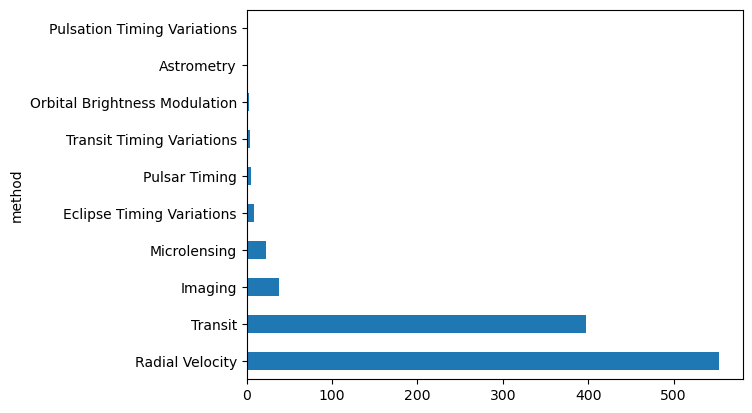

In [41]:
df["method"].value_counts().plot.barh();

## Sürekli Değişkenlerin Özetleri

In [42]:
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [44]:
df_num = df.select_dtypes(include = ["float64","int64"])

In [47]:
df_num.head()

,number,orbital_period,mass,distance,year
0,1,269.300,7.10,77.40,2006
1,1,874.774,2.21,56.95,2008
2,1,763.000,2.60,19.84,2011
3,1,326.030,19.40,110.62,2007
4,1,516.220,10.50,119.47,2009


In [48]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [53]:
## Spesifik Bir Degisken Uzerinde Calismak

In [51]:
df_num["distance"].describe().T

count     808.000000
mean      264.069282
std       733.116493
min         1.350000
25%        32.560000
50%        55.250000
75%       178.500000
max      8500.000000
Name: distance, dtype: float64

In [52]:
print("Ortalama: " + str(df_num["distance"].mean()))
print("Dolu Gözlem Sayısı: " + str(df_num["distance"].count()))
print("Maksimum Deger: " + str(df_num["distance"].max()))
print("Minimum Deger: " + str(df_num["distance"].min()))
print("Medyan: " + str(df_num["distance"].median()))
print("Standart Sapma: " + str(df_num["distance"].std()))


Ortalama: 264.06928217821786
Dolu Gözlem Sayısı: 808
Maksimum Deger: 8500.0
Minimum Deger: 1.35
Medyan: 55.25
Standart Sapma: 733.1164929404422


## Dağılım Grafikleri

### Barplot
Kategorik değişkenleri grafikleştirmek için kullanılır.
#### Veri Seti Hiyayesi
* price: dolar cinsinde fiyat (326-18.823)
* carat: kalite (Fair, Good, Very Good, Premium, Ideal)
* color: renk (from J (worst) to D (best))
* clarity: temizliği, berraklığı (I1 (worst, SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
* x: length in mm (0-10.74)
* y: width in mm (0-58.9)
* z: debth in mm (0-31.8)
* debth: toplam derinlik yüzdesi = z/mean(x,y) = 2*z/(x+y)(43-79)
* table: elmasın en geniş noktasına göre genişliği (43-95)

In [114]:
import seaborn as sns 
diamonds = sns.load_dataset('diamonds')
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


#### Veri Setine Hızlı Bir Bakış

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9263 entries, 0 to 9262
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    9263 non-null   float64 
 1   cut      9263 non-null   category
 2   color    9263 non-null   category
 3   clarity  9263 non-null   category
 4   depth    9263 non-null   float64 
 5   table    9263 non-null   float64 
 6   price    9263 non-null   int64   
 7   x        9263 non-null   float64 
 8   y        9263 non-null   float64 
 9   z        9263 non-null   float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 534.7 KB


In [116]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,9263.0,0.834819,0.229979,0.20,0.72,0.90,1.01,1.58
depth,9263.0,61.859074,1.654945,43.00,61.00,61.90,62.70,71.80
table,9263.0,57.820792,2.359075,49.00,56.00,58.00,59.00,70.00
price,9263.0,3334.952823,1078.503743,326.00,3005.00,3546.00,4099.00,4561.00
x,9263.0,5.960895,0.648360,3.79,5.76,6.11,6.37,7.56
y,9263.0,5.961807,0.637337,3.75,5.78,6.11,6.37,7.51
z,9263.0,3.685888,0.412024,0.00,3.56,3.79,3.95,4.87


In [117]:
df["cut"].value_counts()

cut
Ideal        2934
Very Good    2324
Premium      2307
Good         1219
Fair          479
Name: count, dtype: int64

In [118]:
df["color"].value_counts()

color
F    1738
E    1703
G    1602
H    1452
D    1235
I     984
J     549
Name: count, dtype: int64

In [119]:
df["clarity"].value_counts()

clarity
SI2     2865
SI1     2400
VS2     1588
VS1     1153
VVS2     500
VVS1     373
I1       254
IF       130
Name: count, dtype: int64

In [120]:
# Ordinal tanimlama
from pandas.api.types import CategoricalDtype

In [121]:
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [122]:
cut_categories = ["Fair", "Good", "Very Good", "Premium", "Ideal"]

In [123]:
df.cut = df.cut.astype(CategoricalDtype( categories = cut_categories, ordered = True))

In [124]:
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Very Good' < 'Premium' < 'Ideal']

In [125]:
df["cut"].value_counts()

cut
Ideal        2934
Very Good    2324
Premium      2307
Good         1219
Fair          479
Name: count, dtype: int64

In [126]:
## Pandas ile Barplot Olusturma

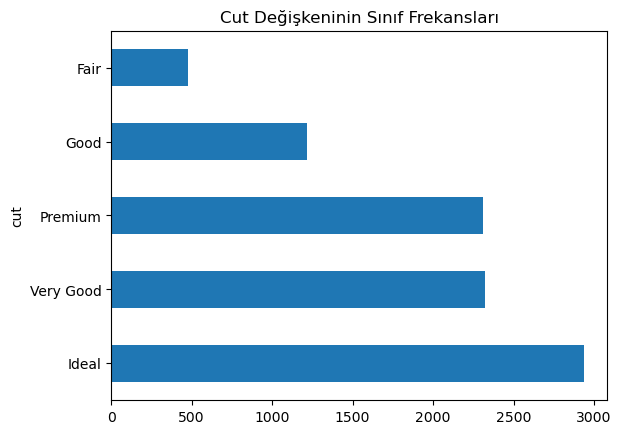

In [127]:
df["cut"].value_counts().plot.barh().set_title("Cut Değişkeninin Sınıf Frekansları");

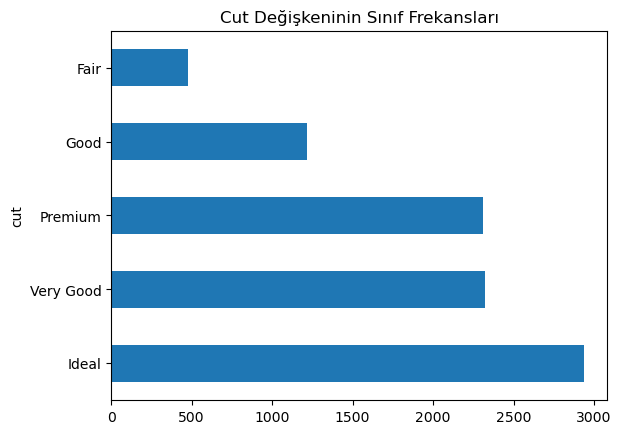

In [128]:
# Ayni isleni asagidaki sekilde yapabiliriz
(df["cut"]
 .value_counts()
 .plot.barh()
 .set_title("Cut Değişkeninin Sınıf Frekansları"));

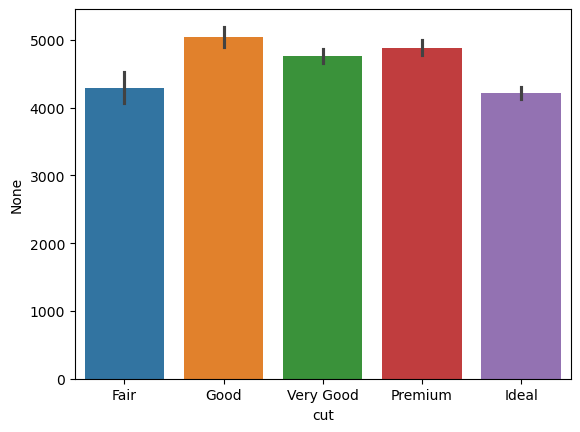

In [129]:
sns.barplot( x = "cut", y = df.cut.index, hue="cut", data = df);

In [131]:
## Seaborn ile Barplot Olusturma

#### Çaprazlamalar
Veri seti içerisinde yer alan değişkenlerin birlikte değerlendirilmesi anlamına gelir.

In [147]:
import seaborn as sns
from pandas.api.types import CategoricalDtype
diamonds = sns.load_dataset('diamonds')
df = diamonds.copy()
cut_categories = ["Fair", "Good", "Very Good", "Premium", "Ideal"]
df.cut = df.cut.astype(CategoricalDtype(categories = cut_categories, ordered = True))
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [148]:
# 'cut' degiskeni ile 'price' degiskenini birlikte degerlendirecegiz

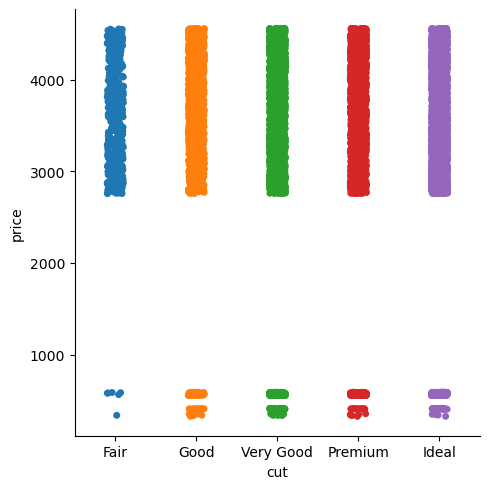

In [149]:
sns.catplot( x = "cut", y = "price", hue="cut", data = df);

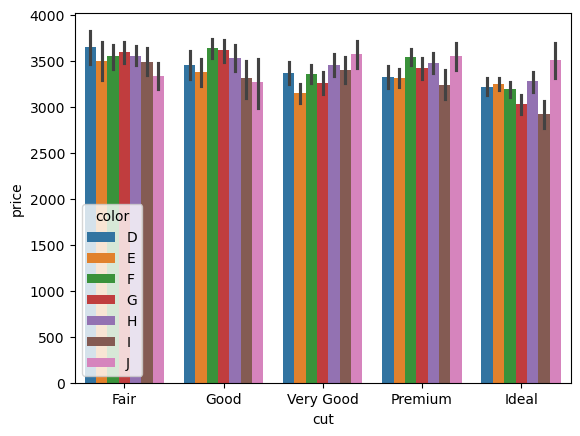

In [150]:
# hue = "color":  Her 'cut' kategorisi icinde 'color' siniflarini farkli renklerle gostererek cok boyutlu bir gorsellestirme saglar
# Burada 'price' eksenindeki degerler 'price' degiskeninin ortalama degerleri ve cubuklar ise std. sapma degerlerini temsil eder
sns.barplot( x = "cut", y = "price", hue="color", data = df);

In [151]:
df.color.head()

0    E
1    E
2    E
3    I
4    J
Name: color, dtype: category
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']

In [152]:
color_categories = ["J", "I", "H", "G", "F", "E", "D"]
df.color = df.color.astype(CategoricalDtype(categories = color_categories, ordered = True))

In [153]:
df.color.head()

0    E
1    E
2    E
3    I
4    J
Name: color, dtype: category
Categories (7, object): ['J' < 'I' < 'H' < 'G' < 'F' < 'E' < 'D']

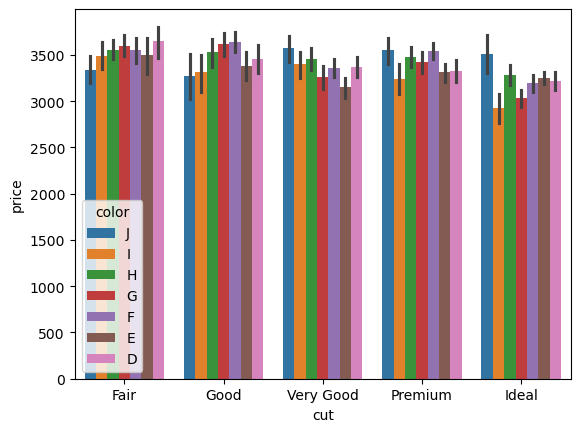

In [154]:
sns.barplot( x = "cut", y = "price", hue="color", data = df);

In [158]:
df.groupby(["cut","color"])["price"].mean()

C:\Users\BUSE GÜLÇEN\AppData\Local\Temp\ipykernel_3208\1250844969.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["cut","color"])["price"].mean()


cut        color
Fair       J        3339.702703
           I        3489.781818
           H        3552.872340
           G        3596.518987
           F        3552.174419
           E        3495.662162
           D        3655.166667
Good       J        3275.658228
           I        3312.617391
           H        3534.111111
           G        3621.971292
           F        3639.502075
           E        3378.245370
           D        3459.988827
Very Good  J        3574.105263
           I        3403.008734
           H        3457.175287
           G        3257.844687
           F        3361.611236
           E        3148.600418
           D        3368.388889
Premium    J        3554.299363
           I        3240.706960
           H        3475.929648
           G        3422.880711
           F        3546.412037
           E        3311.473146
           D        3326.557252
Ideal      J        3510.825175
           I        2922.820513
           H        328

### Histogram ve Yoğunluk

In [159]:
import seaborn as sns 
diamonds = sns.load_dataset('diamonds')
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


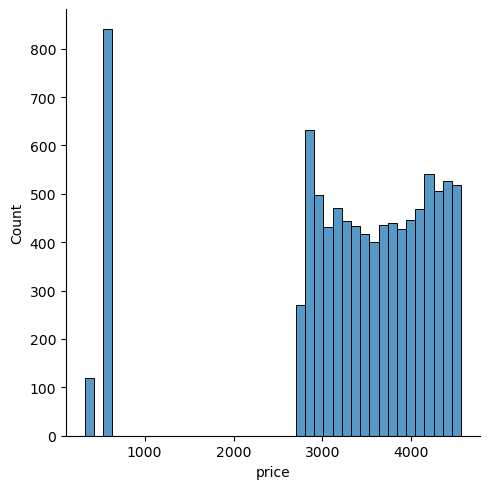

In [165]:
sns.displot(data=df, x="price", kde=False)

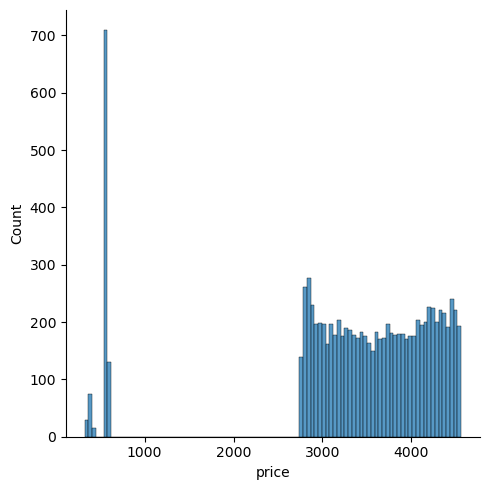

In [169]:
sns.displot(data=df, x="price", bins = 100, kde=False)

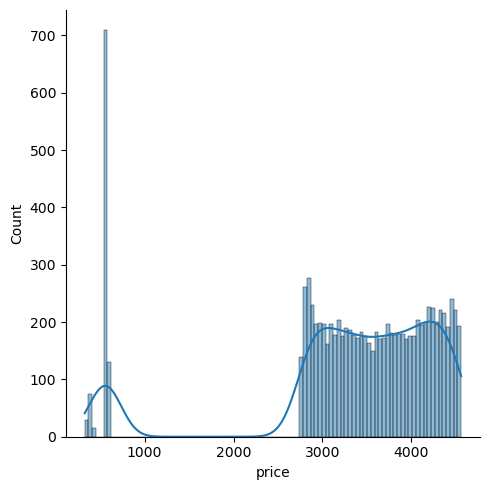

In [175]:
sns.displot(data=df, x="price", bins = 100,  kde=True); # yogunluk grafigi ile birlikte

In [176]:
df.price.describe()

count    9263.000000
mean     3334.952823
std      1078.503743
min       326.000000
25%      3005.000000
50%      3546.000000
75%      4099.000000
max      4561.000000
Name: price, dtype: float64

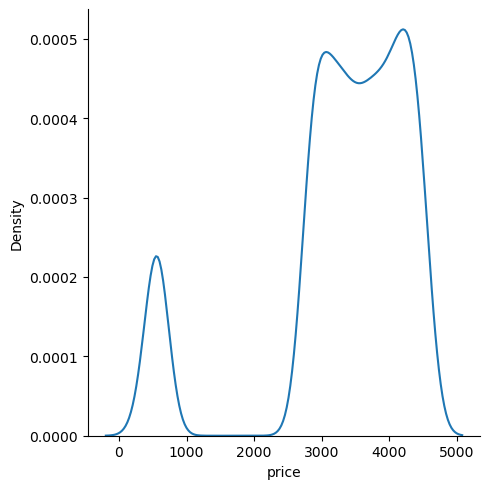

In [179]:
sns.displot(df.price, kind="kde")

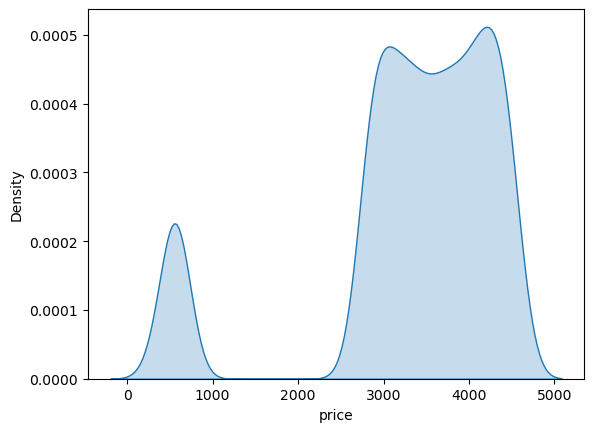

In [182]:
sns.kdeplot(df.price, fill=True);

#### Çaprazlamalar

In [189]:
import seaborn as sns 
diamonds = sns.load_dataset('diamonds')
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


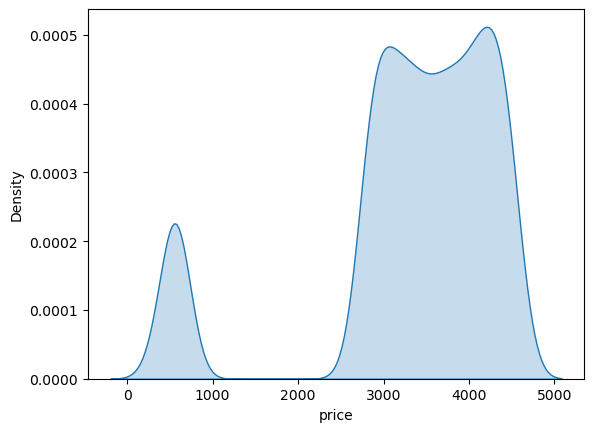

In [190]:
sns.kdeplot(df.price, fill=True);

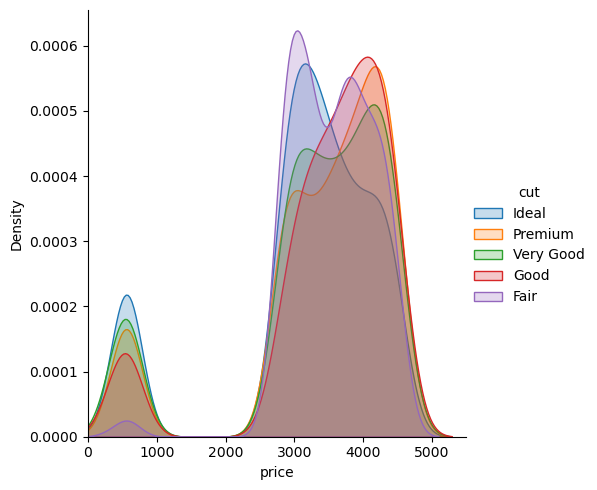

In [193]:
(sns.FacetGrid(df,
               hue = "cut",
               height = 5,
               xlim = (0,5500))
 .map(sns.kdeplot, "price", fill = True)
 .add_legend()
);

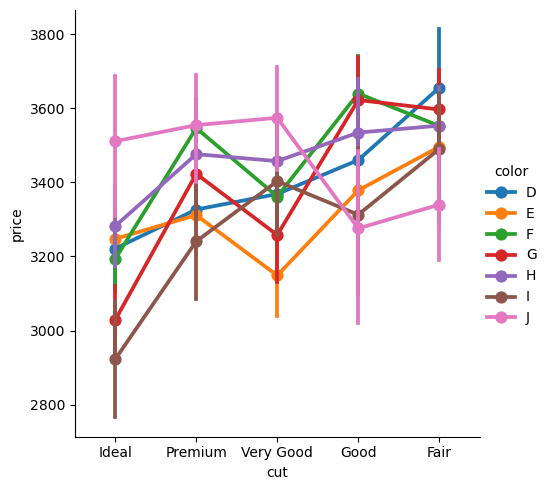

In [196]:
# Burada 'price' degiskeninin farkli seviyelerinde 'cut' ve 'color' kategorik degiskenlerinin etkilerini bilrikte goruruz
sns.catplot(x = "cut", y = "price", hue = "color", kind = "point", data = df);

Grafikte Ideal kesim elmasların ortalama fiyatı en yüksek görünmekte. Özellikle D ve E renklerinde bu fark daha belirgin.
Fair kesimlerde ise renk farkı fiyat üzerinde daha az etkili. Güven aralıkları Premium ve Ideal kesimlerde daha kısa, bu da fiyatların daha tutarlı olduğunu gösteriyor.


## Boxplot

### Veri Seti Hikayesi
* total_bill: yemeğin toplam fiyatı (bahşiş ve vergi dahil)
* tip: bahşiş
* sex: ücreti ödeyen kişinin cinsiyeti (0=male, 1=female)
* smoker: grupta sigara içen var mı? (0=No, 1=Yes)
* day: gün (3=Tur, 4=Fri, 5=Sat, 6=Sun)
* time: ne zaman?(0=Day, 1=Night)
* size: grupta kaç kişi var?

In [13]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [15]:
df["sex"].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

In [16]:
df["smoker"].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [17]:
df["day"].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [18]:
df["time"].value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

<Axes: xlabel='total_bill'>

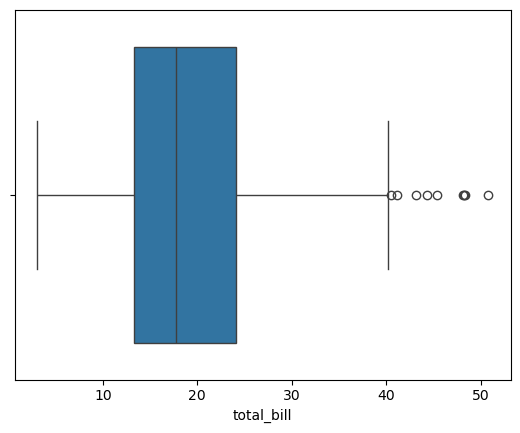

In [19]:
sns.boxplot(x = df["total_bill"])

## Çaprazlamalar

In [21]:
# Hangi gunler daha fazla kazaniyoruz?

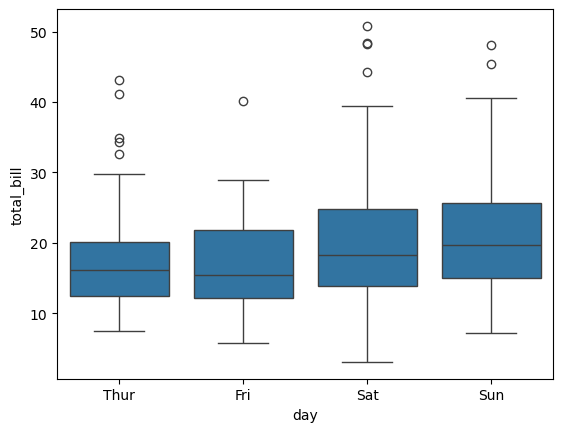

In [25]:
sns.boxplot(x = "day", y = "total_bill", data = df);

In [26]:
# Sabah mi aksam mi daha cok kazaniyoruz?

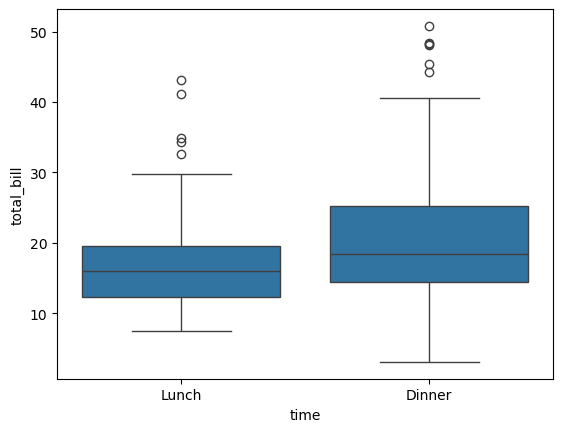

In [27]:
sns.boxplot(x = "time", y = "total_bill", data = df);

In [28]:
# Kisi sayisikazanc iliskisi

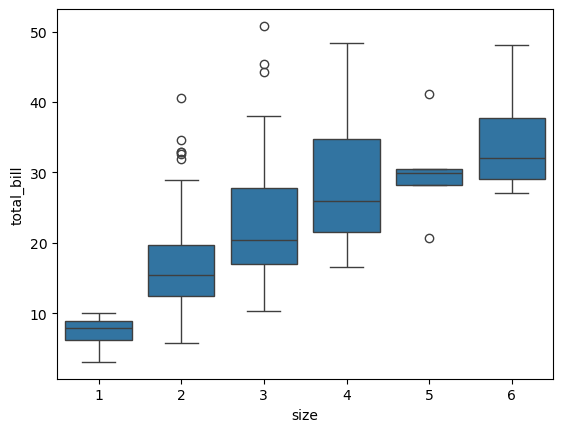

In [29]:
sns.boxplot(x = "size", y = "total_bill", data = df);

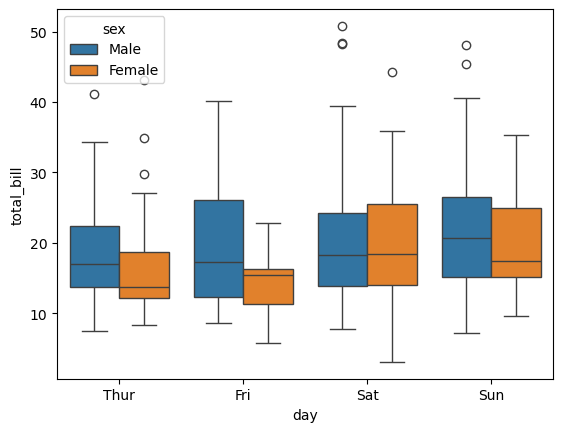

In [30]:
sns.boxplot(x = "day", y = "total_bill", hue= "sex", data = df);

## Violin

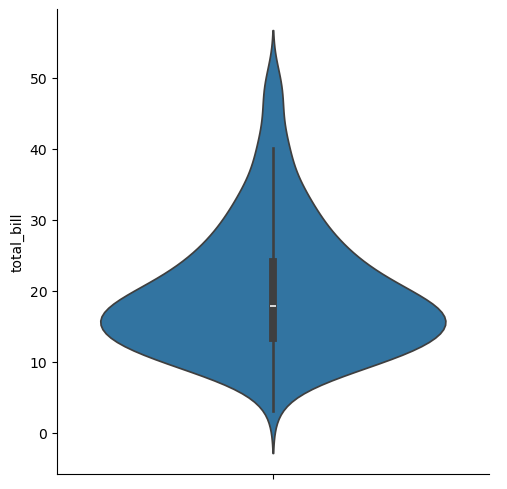

In [31]:
sns.catplot( y = "total_bill", kind = "violin", data = df);

In [32]:
# Violin Caprazlamalar

In [112]:
sns.catplot(x = "day", y = "total_bill", kind = "violin", data = df);

ValueError: Could not interpret value `day` for `x`. An entry with this name does not appear in `data`.

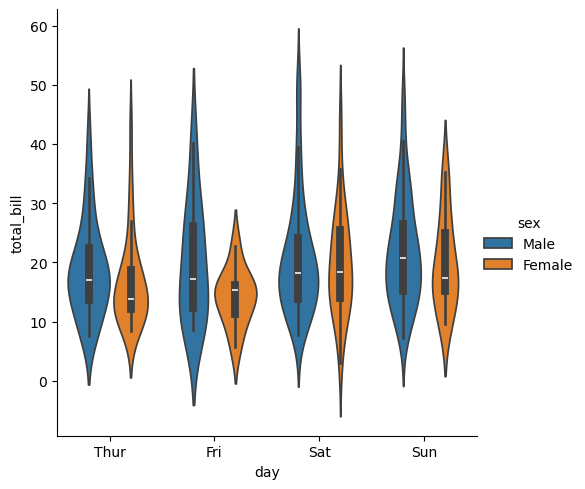

In [35]:
sns.catplot(x = "day", y = "total_bill", hue = "sex", kind = "violin", data = df);

## Korelasyon Grafikleri

### Scatterplot

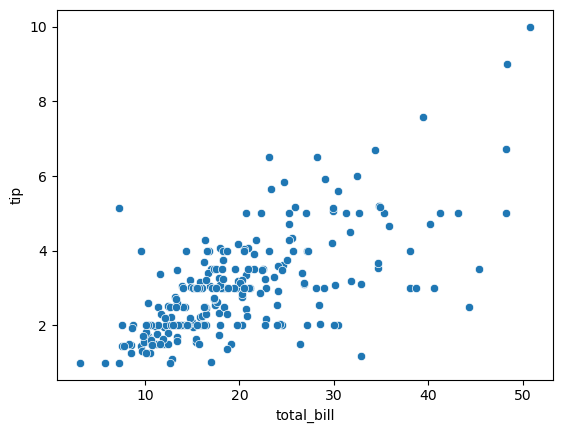

In [37]:
sns.scatterplot(x = "total_bill", y = "tip", data = df);

In [38]:
# Korelasyon Caprazlamalar

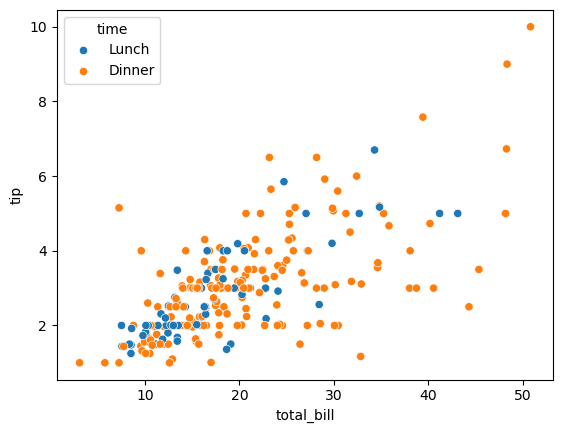

In [40]:
sns.scatterplot(x = "total_bill", y = "tip", hue = "time", data = df);

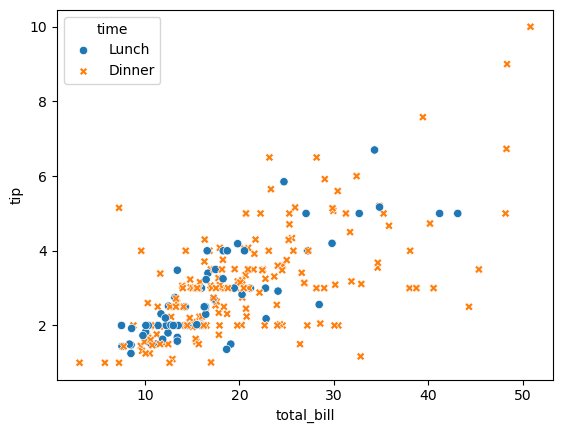

In [41]:
sns.scatterplot(x = "total_bill", y = "tip", hue = "time", style = "time", data = df);

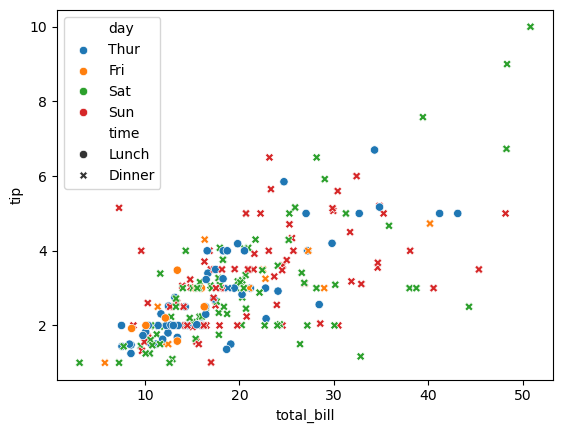

In [42]:
sns.scatterplot(x = "total_bill", y = "tip", hue = "day", style = "time", data = df);

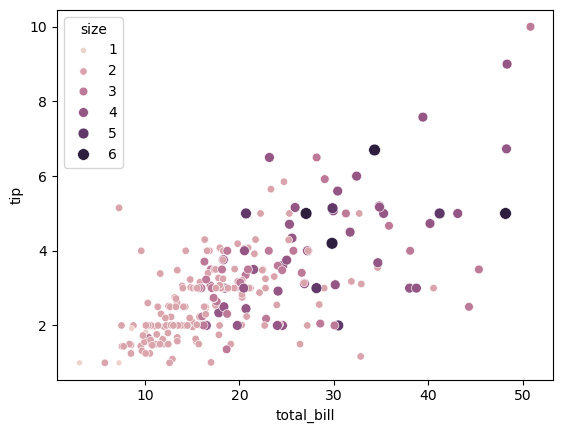

In [44]:
sns.scatterplot(x = "total_bill", y = "tip", hue = "size", size = "size", data = df);

## Doğrusal İlişkinin Gösterilmesi

In [45]:
import matplotlib.pyplot as plt

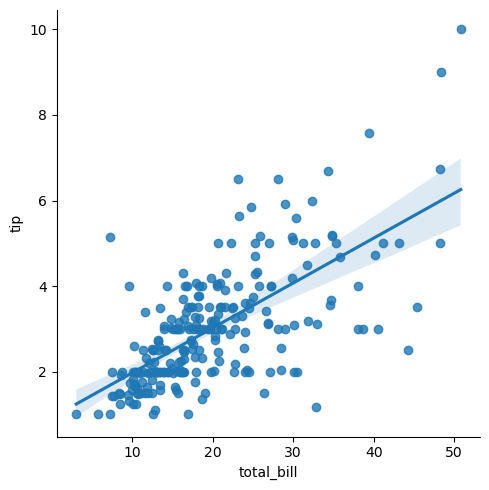

In [46]:
sns.lmplot(x ="total_bill", y = "tip", data = df);

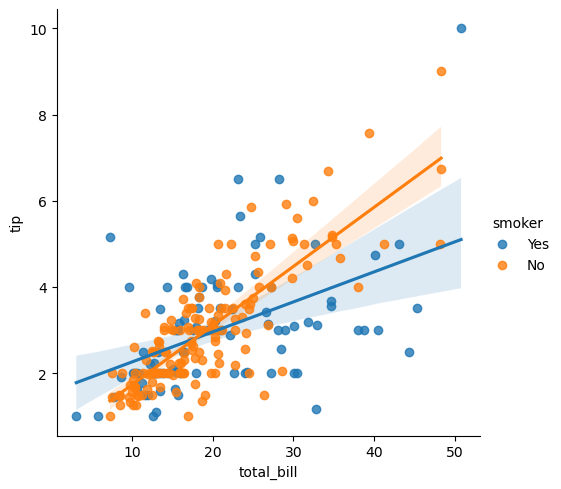

In [47]:
sns.lmplot(x ="total_bill", y = "tip",hue = "smoker", data = df);

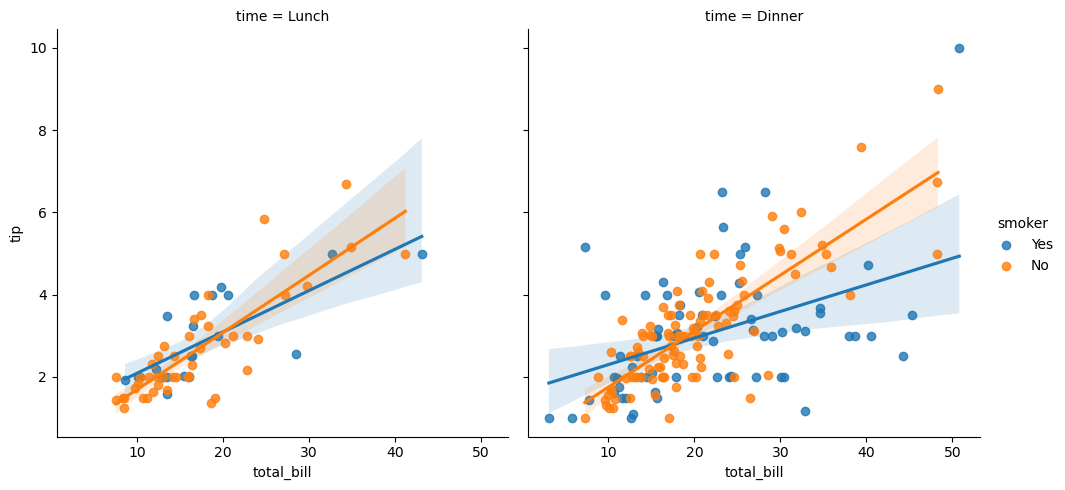

In [48]:
sns.lmplot(x ="total_bill", y = "tip",hue = "smoker", col = "time", data = df);

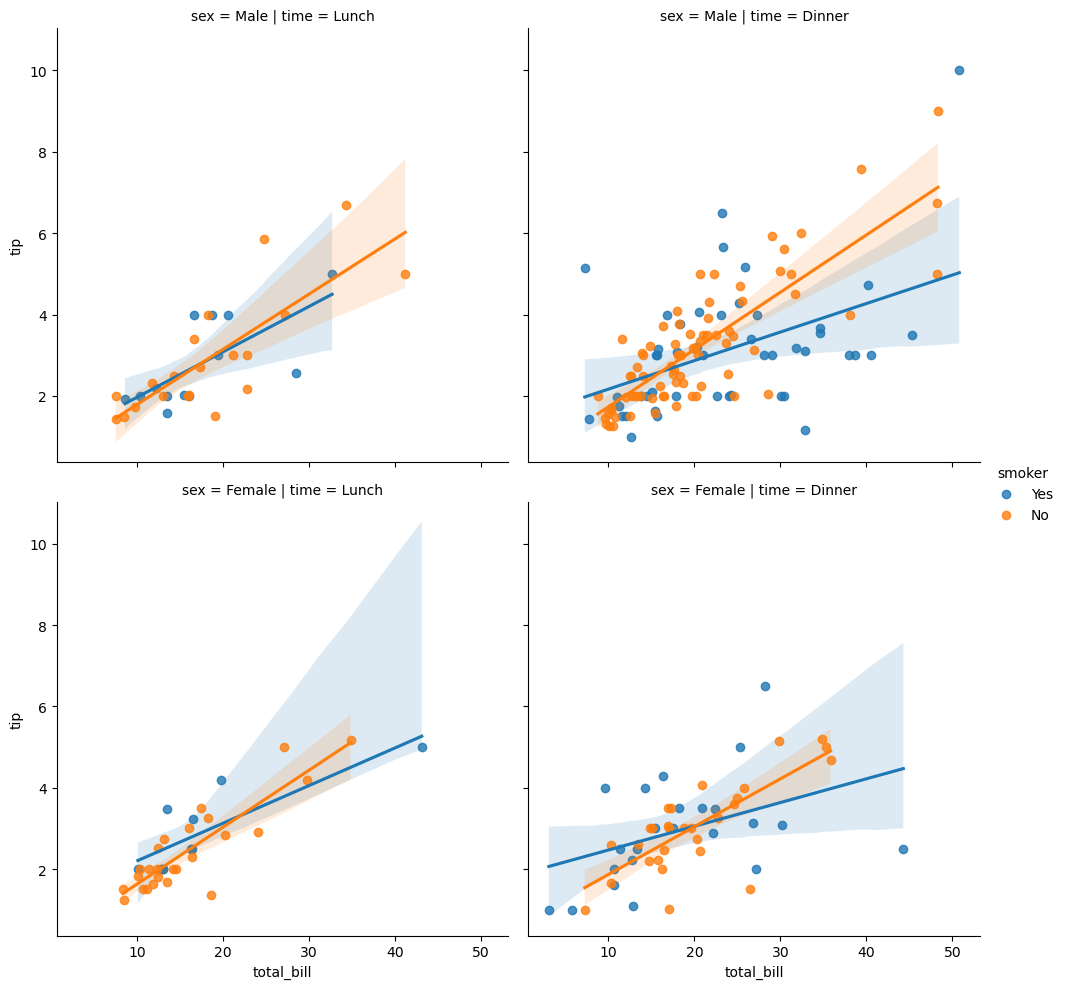

In [49]:
sns.lmplot(x ="total_bill", y = "tip",hue = "smoker", col = "time",row = "sex", data = df);

### Scatterplot Matrisi

In [50]:
iris = sns.load_dataset("iris")
df = iris.copy()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [51]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [52]:
df.shape

(150, 5)

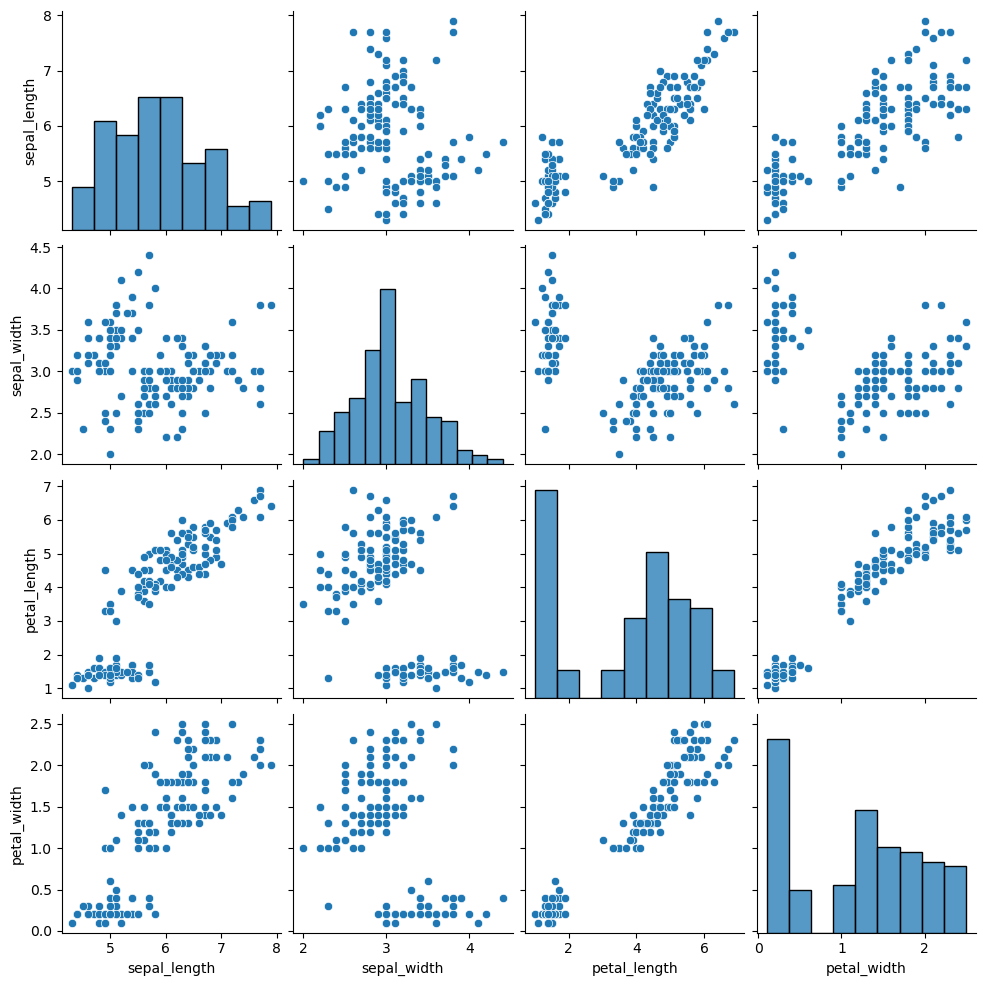

In [53]:
sns.pairplot(df);

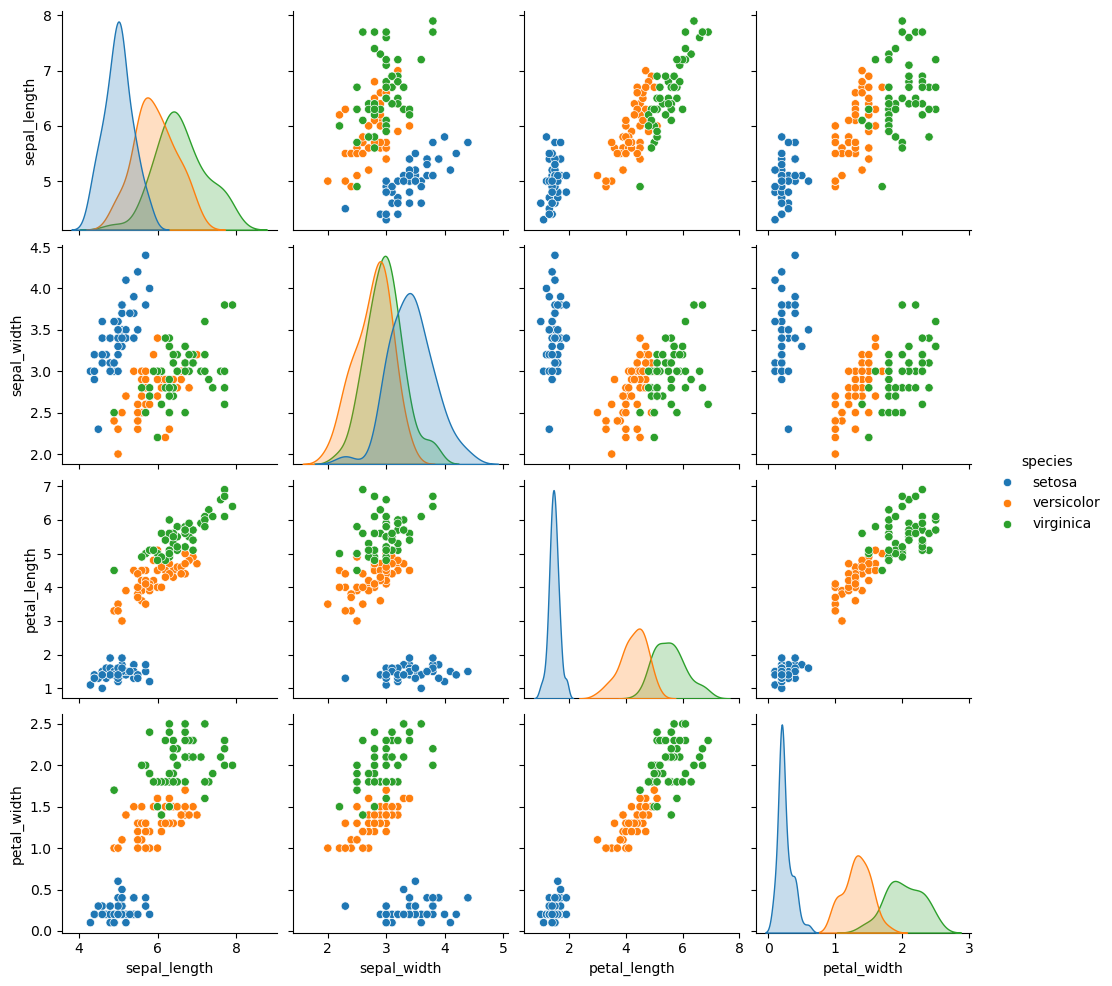

In [54]:
sns.pairplot(df, hue = "species");

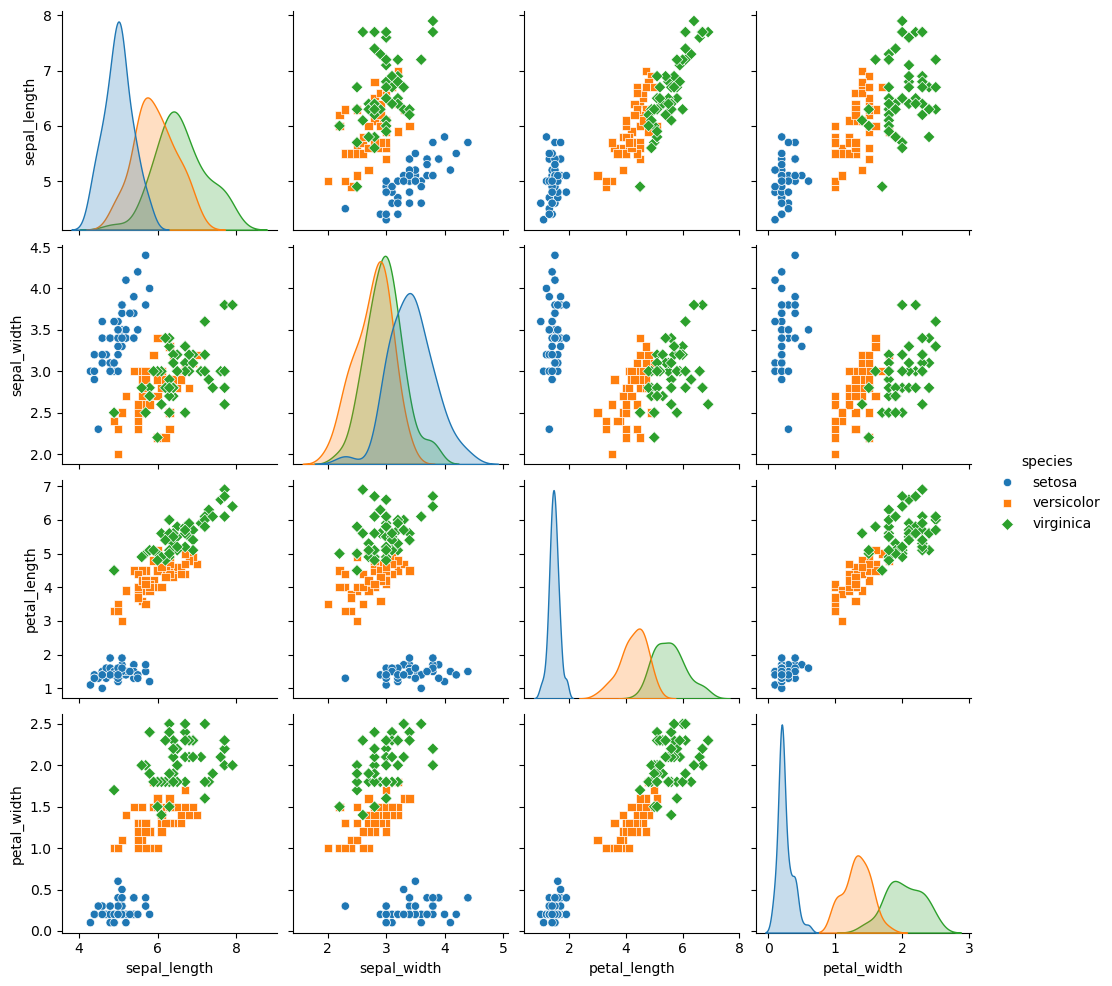

In [55]:
sns.pairplot(df, hue = "species", markers = ["o", "s", "D"]);

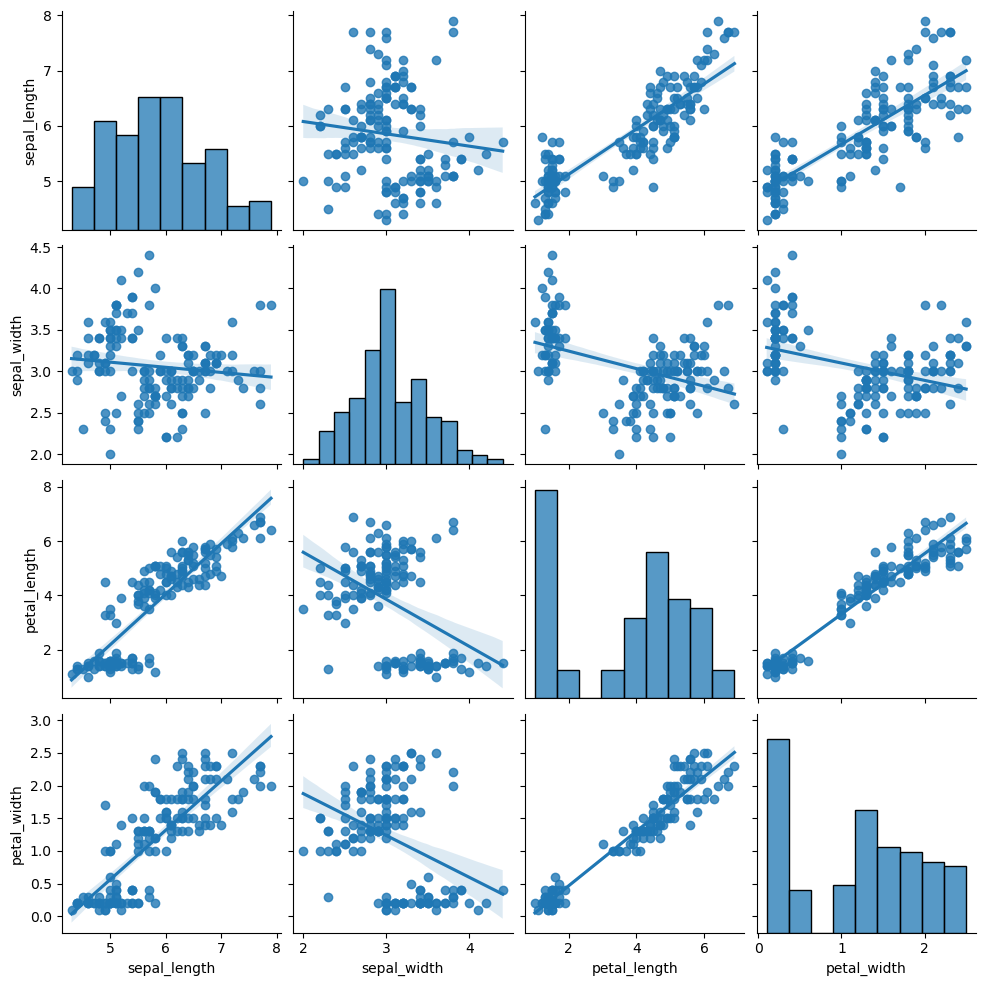

In [56]:
sns.pairplot(df, kind = "reg");

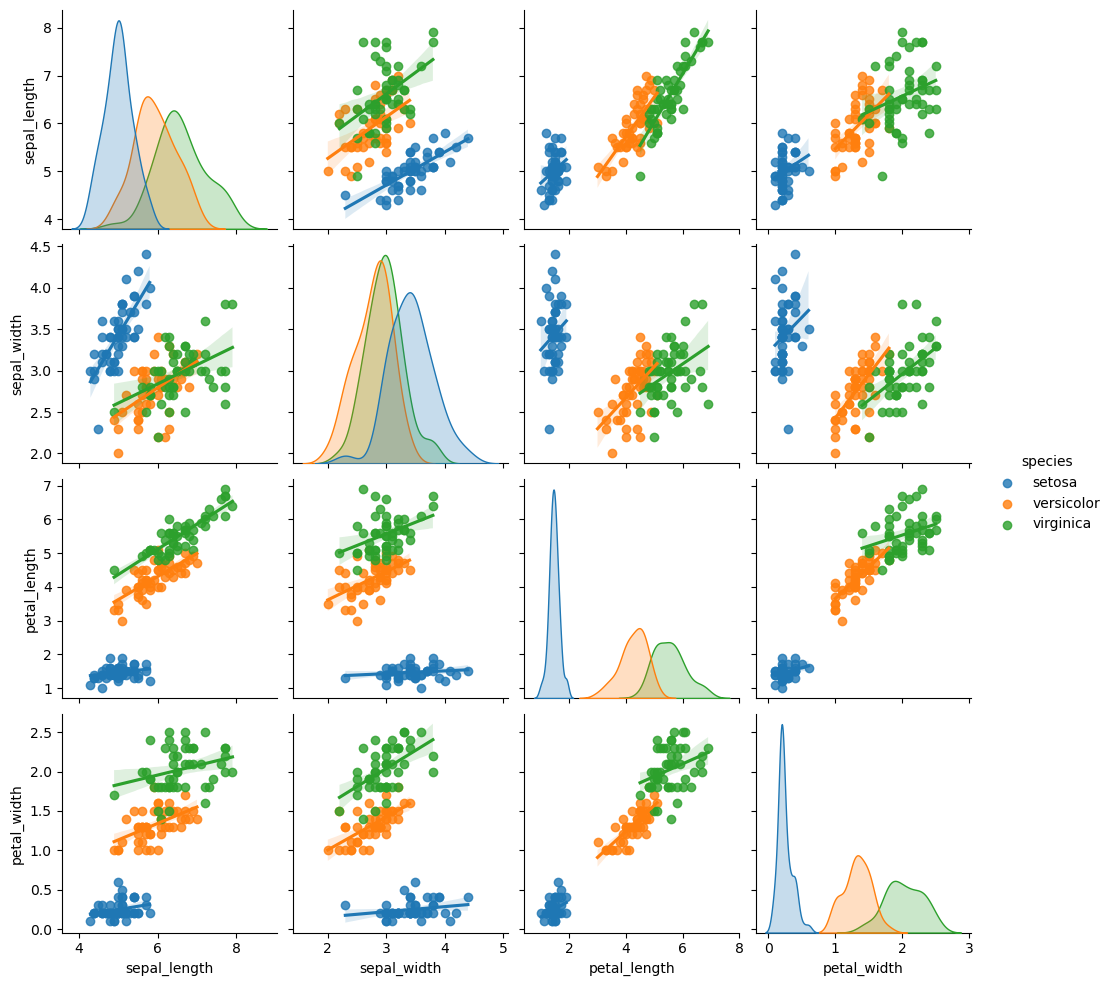

In [57]:
sns.pairplot(df, kind = "reg", hue = "species");

## Heatmap
### Veri Seti Hikayesi

In [72]:
import seaborn as sns
flights = sns.load_dataset('flights')
df = flights.copy()
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [73]:
df.shape

(144, 3)

In [74]:
df["passengers"].describe()

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: passengers, dtype: float64

In [75]:
df = df.pivot(index="month", columns="year", values="passengers")
df

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<Axes: xlabel='year', ylabel='month'>

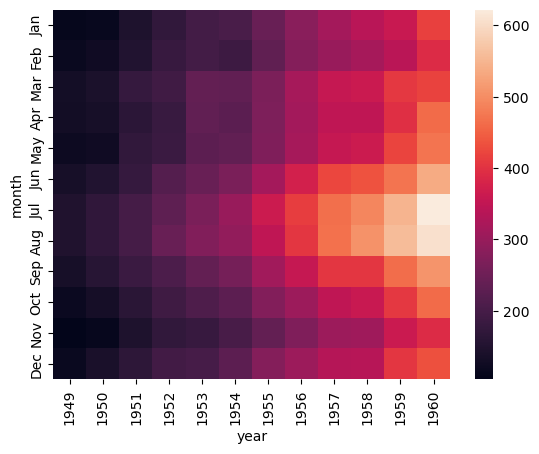

In [76]:
sns.heatmap(df)

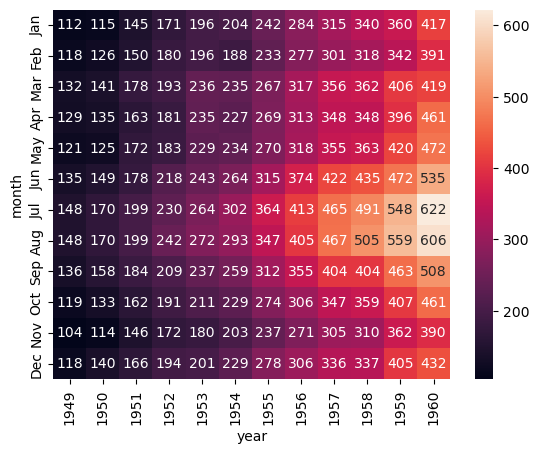

In [78]:
sns.heatmap(df, annot = True, fmt = "d");

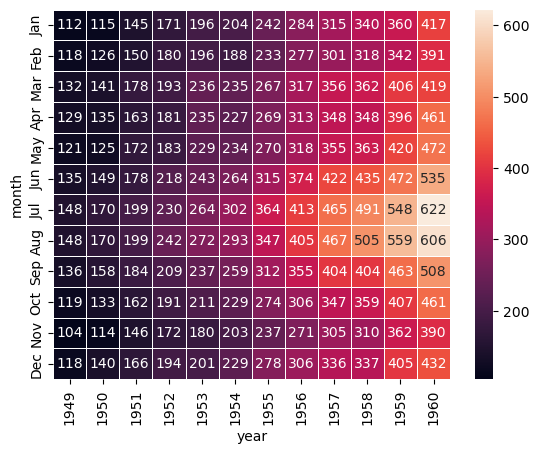

In [79]:
sns.heatmap(df, annot = True, fmt = "d", linewidths = 0.5);

## Çizgi Grafik

### Veri Seti Hikayesi

In [80]:
import seaborn as sns
fmri = sns.load_dataset("fmri")
df = fmri.copy()
df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [81]:
df.shape

(1064, 5)

In [82]:
df["timepoint"].describe()

count    1064.000000
mean        9.000000
std         5.479801
min         0.000000
25%         4.000000
50%         9.000000
75%        14.000000
max        18.000000
Name: timepoint, dtype: float64

In [83]:
df["signal"].describe()

count    1064.000000
mean        0.003540
std         0.093930
min        -0.255486
25%        -0.046070
50%        -0.013653
75%         0.024293
max         0.564985
Name: signal, dtype: float64

In [84]:
df.groupby("timepoint")["signal"].count()

timepoint
0     56
1     56
2     56
3     56
4     56
5     56
6     56
7     56
8     56
9     56
10    56
11    56
12    56
13    56
14    56
15    56
16    56
17    56
18    56
Name: signal, dtype: int64

Her bir zaman noktasına göre eşit sayıda sinyal gönderme işlemi yapılmış.

In [85]:
df.groupby("signal").count()

,subject,timepoint,event,region
signal,,,,
-0.255486,1,1,1,1
-0.238474,1,1,1,1
-0.224351,1,1,1,1
-0.181241,1,1,1,1
-0.178510,1,1,1,1
...,...,...,...,...
0.455575,1,1,1,1
0.460896,1,1,1,1
0.476055,1,1,1,1


Veri setindeki gözlem sayısı ve sinyaller gruplandığında oluşan grup sayısı `(1064)` aynı olduğu için her bir sinyalin eşsiz olduğunu söyleyebiliriz.

In [86]:
df.groupby("timepoint")["signal"].describe()

,count,mean,std,min,25%,50%,75%,max
timepoint,,,,,,,,
0,56.0,-0.016662,0.028326,-0.064454,-0.039169,-0.018382,0.003539,0.074399
1,56.0,-0.025002,0.030641,-0.082174,-0.046299,-0.024533,-0.005388,0.063558
2,56.0,-0.012873,0.035440,-0.110565,-0.034944,-0.013183,0.009318,0.077277
3,56.0,0.034446,0.058260,-0.089708,-0.001157,0.028430,0.061840,0.185581
4,56.0,0.098194,0.092838,-0.046347,0.030912,0.070166,0.144911,0.346775
5,56.0,0.137725,0.123353,-0.017946,0.042762,0.096535,0.211638,0.476055
6,56.0,0.127515,0.137332,-0.054405,0.022409,0.068850,0.218919,0.564985
7,56.0,0.075660,0.129704,-0.108222,-0.016252,0.032486,0.144781,0.494787
8,56.0,0.013420,0.104216,-0.181241,-0.049453,-0.012834,0.030396,0.337143


### Çizgi Grafiğinin (Line Plot) Oluştururlması

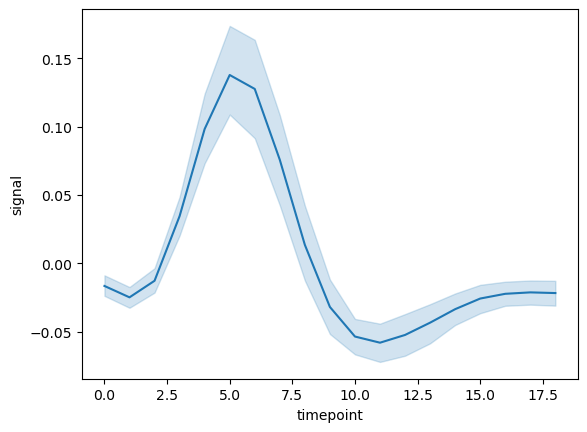

In [87]:
sns.lineplot(x = "timepoint", y = "signal", data = df);

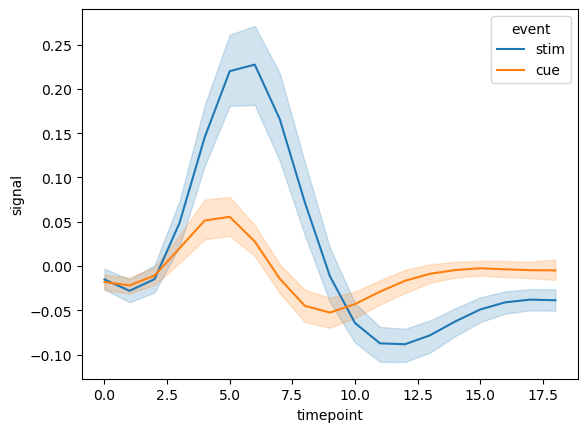

In [88]:
sns.lineplot(x = "timepoint", y = "signal",hue = "event", data = df);

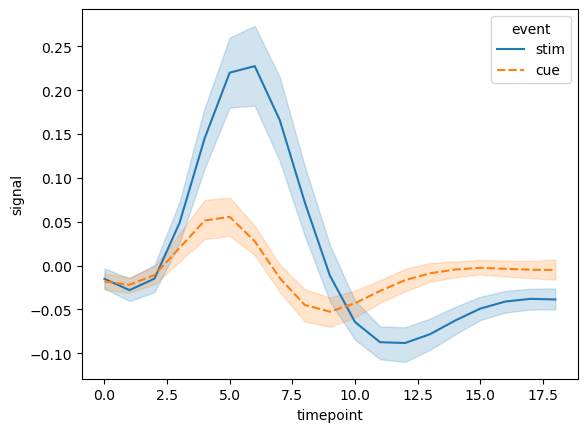

In [89]:
sns.lineplot(x = "timepoint", y = "signal",hue = "event",style = "event", data = df);

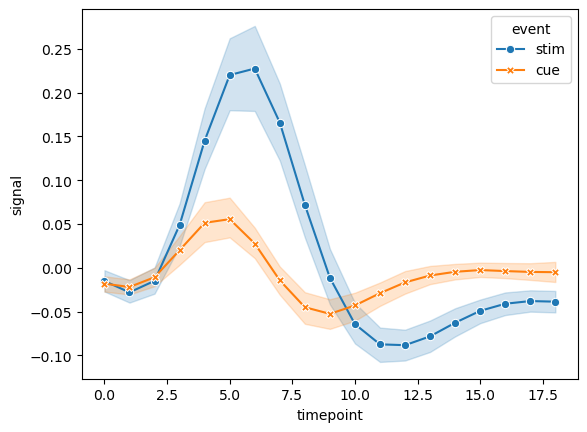

In [93]:
sns.lineplot(x = "timepoint", 
             y = "signal",
             hue = "event", 
             style = "event",
             markers = True,
             dashes = False,
             data = df);

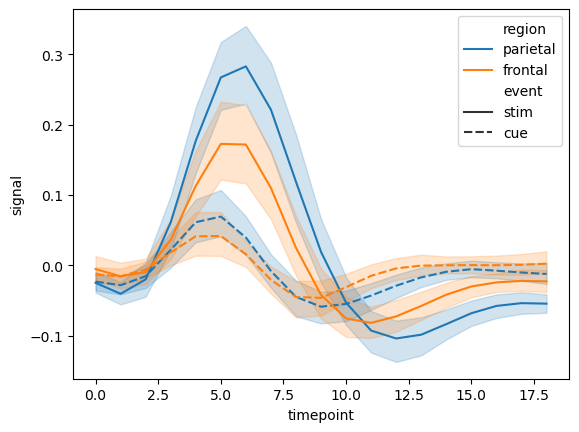

In [94]:
sns.lineplot(x = "timepoint", 
             y = "signal",
             hue = "region", 
             style = "event",
             data = df);

### Basit Zaman Serisi Grafiği

In [98]:
!pip install yfinance
import yfinance as yf
df = yf.download("AAPL", start="2016-01-01", end="2019-08-25")

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     -------------------- ----------------- 524.3/949.2 kB 2.8 MB/s eta 0:00:01
     -------------------------------------- 949.2/949.2 kB 2.3 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ------------ --------------------------- 0.5/1.6 MB 3.4 MB/s eta 0:00:01
   ------------------------- ----------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
C:\Users\BUSE GÜLÇEN\AppData\Local\Temp\ipykernel_8920\1048005128.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("AAPL", start="2016-01-01", end="2019-08-25")
[*********************100%***********************]  1 of 1 completed


In [99]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2016-01-04,23.776180,23.780695,23.020127,23.157797,270597600
2016-01-05,23.180363,23.889021,23.112657,23.866453,223164000
2016-01-06,22.726727,23.103626,22.539407,22.695130,273829600
2016-01-07,21.767565,22.598095,21.763052,22.270849,324377600
2016-01-08,21.882666,22.367894,21.837529,22.241510,283192000


In [100]:
df.shape

(917, 5)

In [103]:
close = df["Close"]

In [104]:
close.head()

Ticker,AAPL
Date,
2016-01-04,23.776180
2016-01-05,23.180363
2016-01-06,22.726727
2016-01-07,21.767565
2016-01-08,21.882666


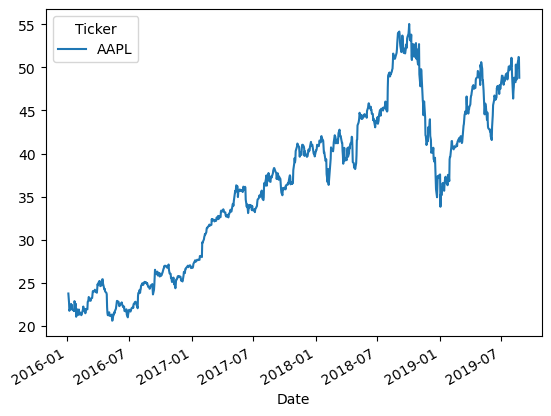

In [105]:
close.plot();

In [110]:
import pandas as pd
close.index = pd.DatetimeIndex(close.index)
close.head()

Ticker,AAPL
Date,
2016-01-04,23.776180
2016-01-05,23.180363
2016-01-06,22.726727
2016-01-07,21.767565
2016-01-08,21.882666


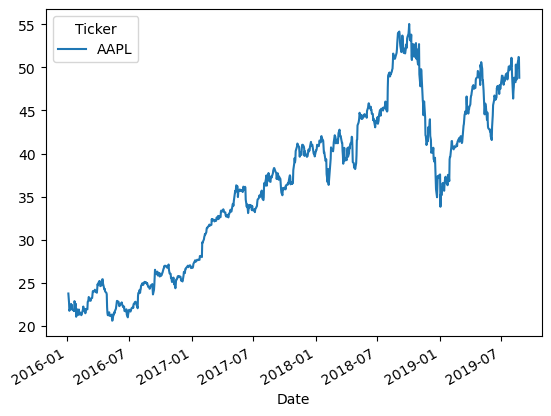

In [111]:
close.plot();